link do kc house: https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from turtle import color

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

#Your code:

model.fit(X, y)

#Hint: .fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercept: -32304.654721028113
Coefficient: 269.4620546846952
Model Score: 0.496708801663114
Mean Squared Error: 57947526161.288376


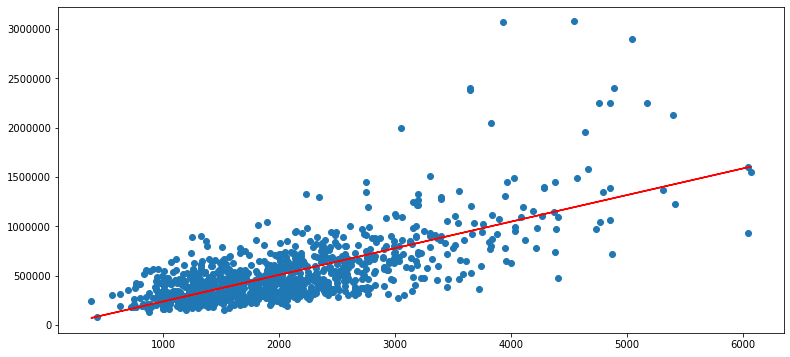

In [3]:
#b)

#Your code:

plt.rcParams['figure.figsize'] = [13, 6]

model.predict(X)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {float(model.coef_)}")
print(f"Model Score: {model.score(X, y)}")
print(f"Mean Squared Error: {mean_squared_error(y, model.predict(X))}")
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

Fitted linear model intercepts y-axis at point (0, -32304.654721028113). Coefficient of linear regression is 269.4620546846952. Score (or coefficient of determination of the prediction) of the model is 0.49 which is not the best result, as the highest possible score is 1. Mean squared error equals 57947526161.288376 and it's a huge error, several times larger than price values.

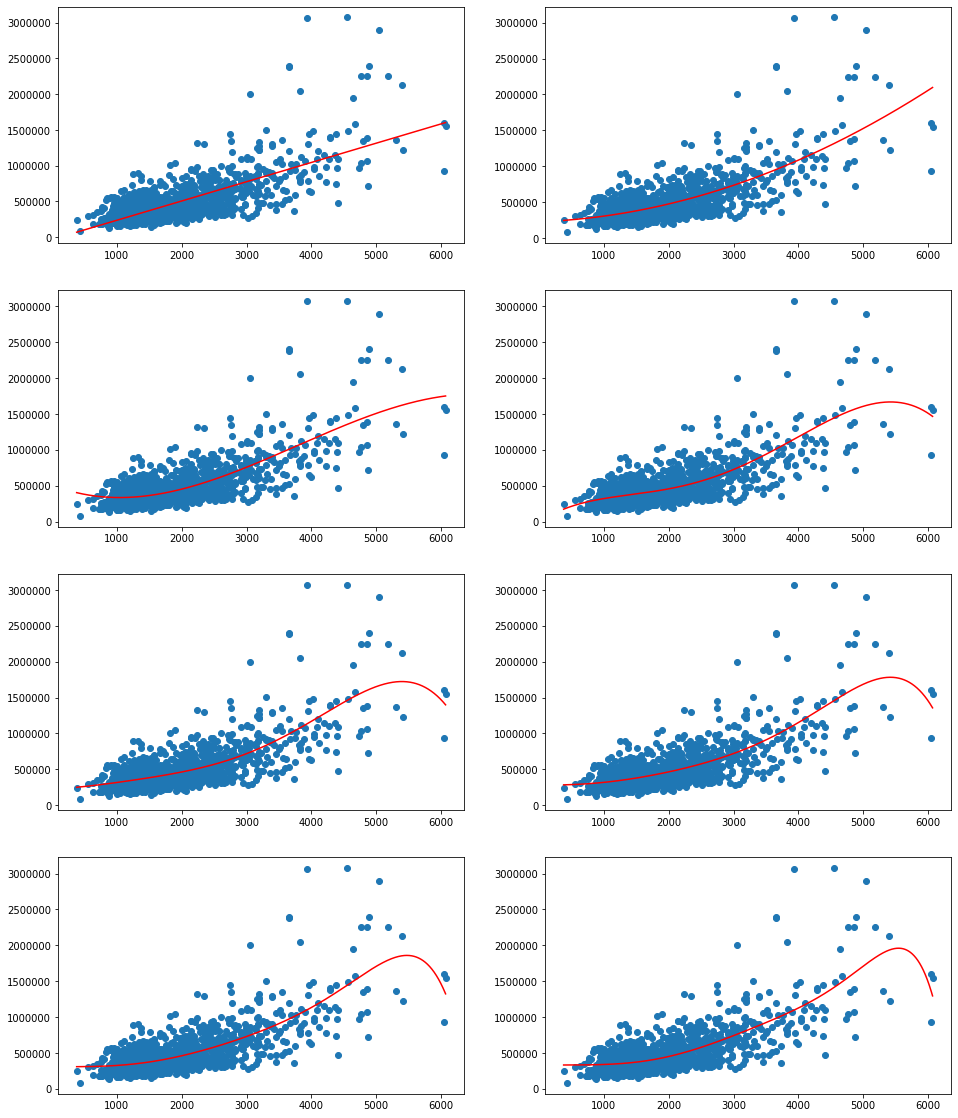

In [4]:
#c)

plt.rcParams['figure.figsize'] = [16, 20]
model_err = []

for order in range(1,9):
    poly = PolynomialFeatures(degree=order, include_bias=False)

    poly_features = poly.fit_transform(X)

    model.fit(poly_features, y)

    y_predicted = model.predict(poly_features)

    model_err.append(mean_squared_error(y, y_predicted))

    po_model = np.poly1d(np.polyfit(X.flatten(), y_predicted, deg=order))
    x = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))
    
    plt.subplot(4, 2, order)
    plt.scatter(X, y)
    plt.plot(x, po_model(x), c='red')

plt.show()

We can see from figures above that with higher degree of polynominal regression it tryes to fit better to the points that are wider spread on the right. For the linear regression fit on that area was the worst.

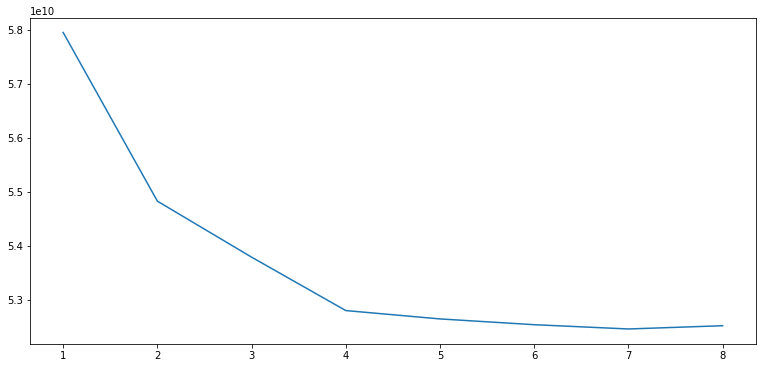

In [5]:
#Your code:

plt.rcParams['figure.figsize'] = [13, 6]
plt.plot(np.arange(1, len(model_err)+1, dtype=int), model_err)

Calculating mean squared error for different degree polynominal regression we can see that on 7th iterration MSE is the smallest, which means it is the best model.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

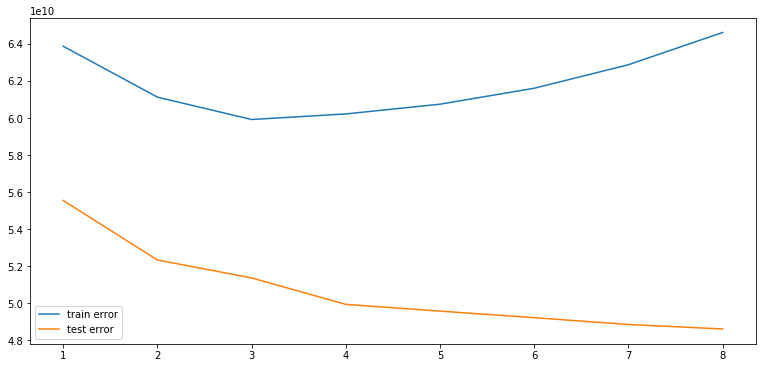

In [6]:
#a)

testErr, trainErr = [], []

for order in range(1,9):
    poly = PolynomialFeatures(degree=order, include_bias=False)

    poly_features = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=44)

    model.fit(X_train, y_train)

    y_predicted_train = model.predict(X_train)
    y_predicted_test = model.predict(X_test)

    testErr.append(mean_squared_error(y_train, y_predicted_train))
    trainErr.append(mean_squared_error(y_test, y_predicted_test))


plt.plot(np.arange(1, len(trainErr)+1, dtype=int), trainErr, label='train error')
plt.plot(np.arange(1, len(testErr)+1, dtype=int), testErr, label='test error')
plt.legend()
plt.show()

Here we have comparison between mean square errors for training and testing data. We can see that while training the MSE is high and after 3rd degree it's getting bigger but for testing it is smaller right from the start and it's getting smaller as the degree increments. 

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

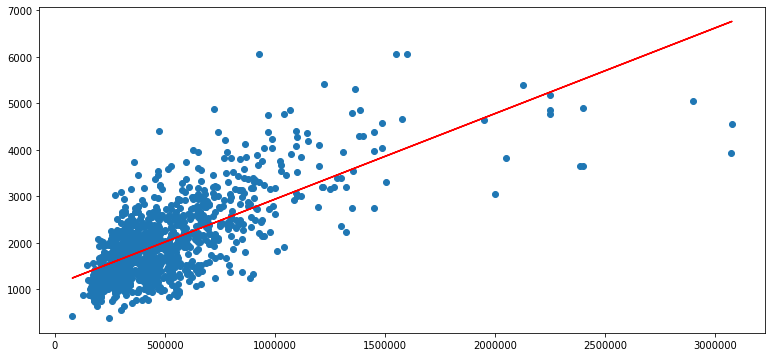

Mean squared error equals: 396407.1889615157


In [7]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model.fit(X, y)

model.predict(X)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()
print("Mean squared error equals:", mean_squared_error(y, model.predict(X)))

Again, like in exercise 1 b) the MSE is huge comparing to values on y-axis, this means our model isn't a good fit.

In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error1 equals: {0}".format(mean_squared_error(y_pred, y_test)))
MSE1 = mean_squared_error(y_pred, y_test)


#Your model:
features = ['sqft_living', 'sqft_lot', 'grade', 'condition', 'view', 'bedrooms', 'bathrooms', 'sqft_living15', 'sqft_lot15']

X = house_df[features].values.reshape(-1,len(features))
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(2, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean Squared Error2 equals: {0}".format(mean_squared_error(y_pred, y_test)))
MSE2 = mean_squared_error(y_pred, y_test)
print("MSE2 < MSE1:", MSE2 < MSE1)


Mean Squared Error1 equals: 48749660021.52826
Mean Squared Error2 equals: 46041983150.82192
MSE2 < MSE1: True


After applying more features and lowering the degree of polynominal regression I managed to get smaller mean squared error. I added condition of house and number of bedrooms and bathrooms because in my opiinon those factors highly effect the price. I also chose sqft_living15 and sqft_lot15 which give a little hint about area around the house and that also can effect the price - the better the neighbourhood the higher price. 